# Exploratory Data Analysis

In [6]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")
sys.path.append('../scripts')
from data_loader import *
from eda import *
import logging

In [7]:
!pip install pyarrow

## Configure logging

In [2]:

logging.basicConfig(filename='eda__analysis.log', level=logging.INFO, 
                    format='%(asctime)s:%(levelname)s:%(message)s')

## Load Datasets

### Train Dataset

In [8]:
# path to the CSV file
filename = 'preprocessed_train_20240531_015454.parquet'
path = os.path.join('..', 'data/02_intermediate', filename)

# Load dataset
train_df = load_data(path)

Error: Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.. An unknown error occurred while loading the dataset.


In [7]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
train_df['Promo'].unique()

array([0, 1], dtype=int64)

## Test dataset

In [4]:
# path to the CSV file
filename = 'test.csv'
path = os.path.join('..', 'data/01_raw', filename)

# Load dataset
formatted_test_df = load_data(path)
formatted_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


## Explore Promo Distribution

Distribution of Promo in the training dataset:
Promo
0    629129
1    388080
Name: count, dtype: int64


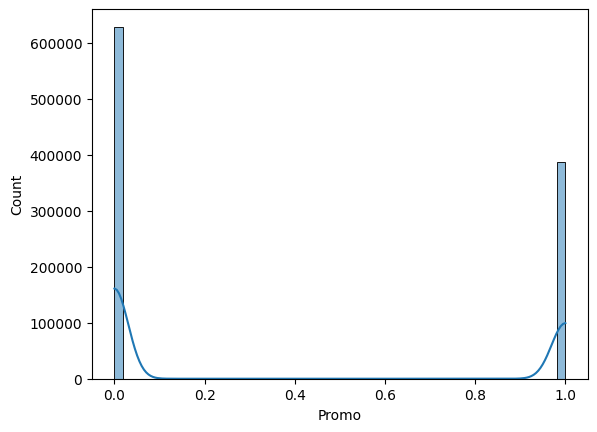

Distribution of Promo in the test dataset:
Promo
0    24824
1    16264
Name: count, dtype: int64


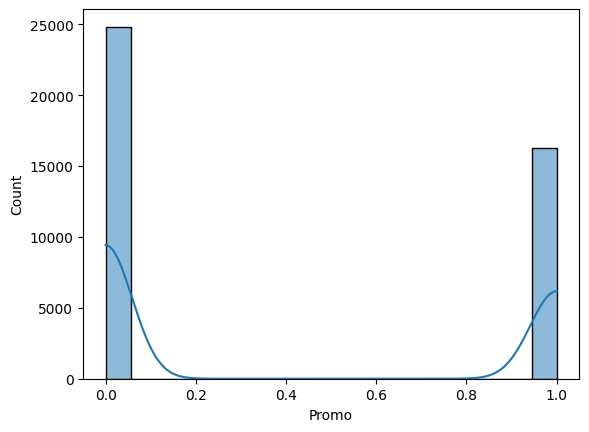

Comparing the distribution of Promo between the training and test datasets:


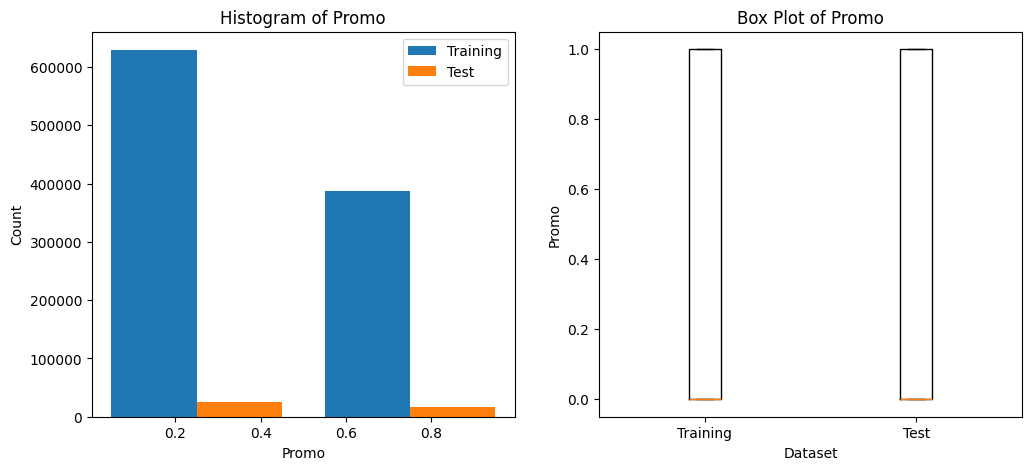

The distribution of Promo is not similar between the training and test datasets.


In [5]:
compare_promo_distribution(train_df,formatted_test_df)

## Analyze the sales behavior before, during, and after holidays.

Sales statistics by holiday type:
                     mean  median          std
StateHoliday                                  
0             5947.483893  5849.0  3767.890619
a              290.735686     0.0  1870.281698
b              214.311510     0.0  1816.918138
c              168.733171     0.0  1492.274865


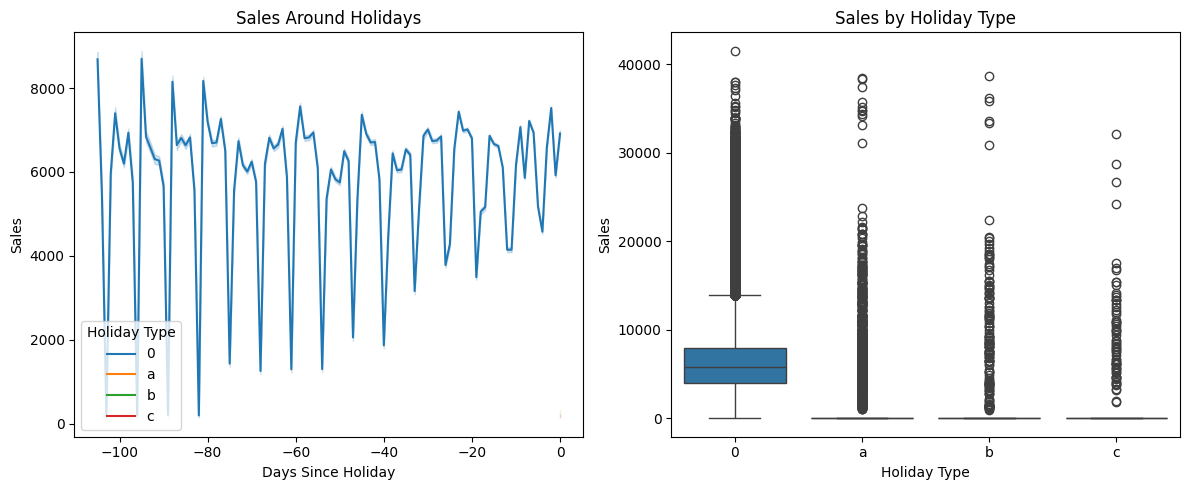

Observations:
Sales tend to be lower during state holidays.
No clear pattern in sales after state holidays.


In [6]:
analyze_sales_around_holidays(train_df)

## Analyze seasonal purchase behaviors in the data

In [3]:
analyze_seasonal_purchases(train_df)

NameError: name 'seasonal_decompose' is not defined

## Analyze the correlation between sales and the number of customers

Correlation coefficient between Sales and Customers: 0.89


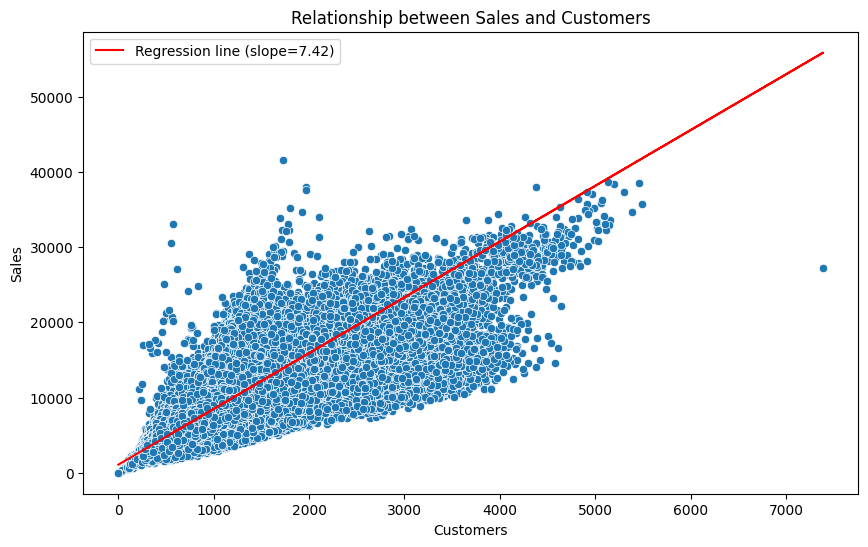

Implications for the sales forecasting model:
The positive correlation between sales and the number of customers suggests that the sales forecasting model should incorporate the customer count as a feature. This could improve the model's ability to predict sales accurately.


In [4]:
analyze_sales_customers_correlation(train_df)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813767 entries, 0 to 813766
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      813767 non-null  int64         
 1   DayOfWeek                  813767 non-null  int64         
 2   Date                       813767 non-null  datetime64[ns]
 3   Customers                  813767 non-null  int64         
 4   Open                       813767 non-null  bool          
 5   Promo                      813767 non-null  int64         
 6   StateHoliday               813767 non-null  int32         
 7   SchoolHoliday              813767 non-null  bool          
 8   StoreType                  813767 non-null  int32         
 9   Assortment                 813767 non-null  int32         
 10  CompetitionDistance        813767 non-null  float64       
 11  CompetitionOpenSinceMonth  813767 non-null  float64 

## Analyzing the impact of promotions on sales and customers

Number of new customers during promotion periods: 318263948
Number of repeat customers during non-promotion periods: 325777807


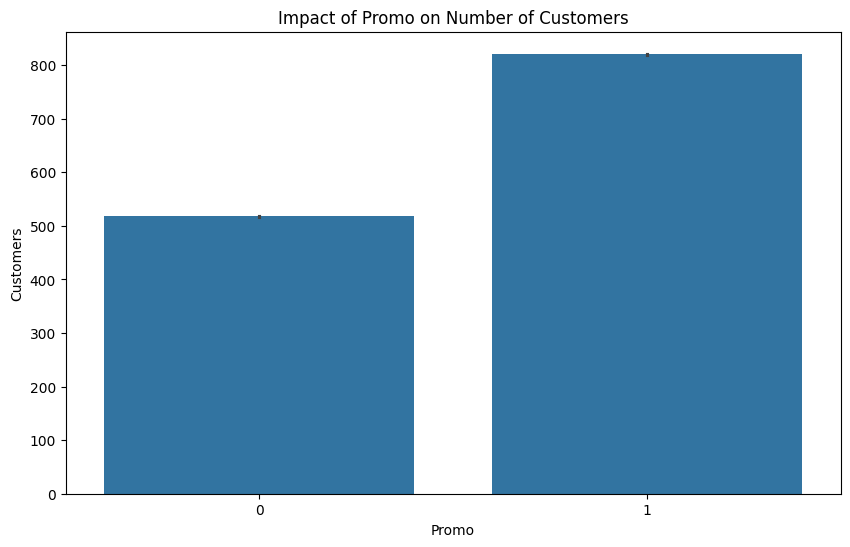

T-test results: t-statistic = 336.12, p-value = 0.00
The promotion has a significant impact on the number of customers (p < 0.05).


In [5]:
analyze_promo_impact(train_df)

## Investigating the relationship between Promo, Sales etc..
Investigate the relationship between Promo, Sales, and other relevant features
to identify more effective ways of deploying promotions.

In [4]:
optimize_promo_deployment(train_df)

ValueError: could not convert string to float: 'a'

## Analyzing the trends in customer behavior and sales during store opening and closing times.

Impact of store opening and closing on customer behavior and sales:
Open stores:
       Customers        Sales
mean  762.663777  6955.720203
std   401.110587  3106.170462

Closed stores:
      Customers  Sales
mean        0.0    0.0
std         0.0    0.0

Visualizing trends in Customers and Sales over time:


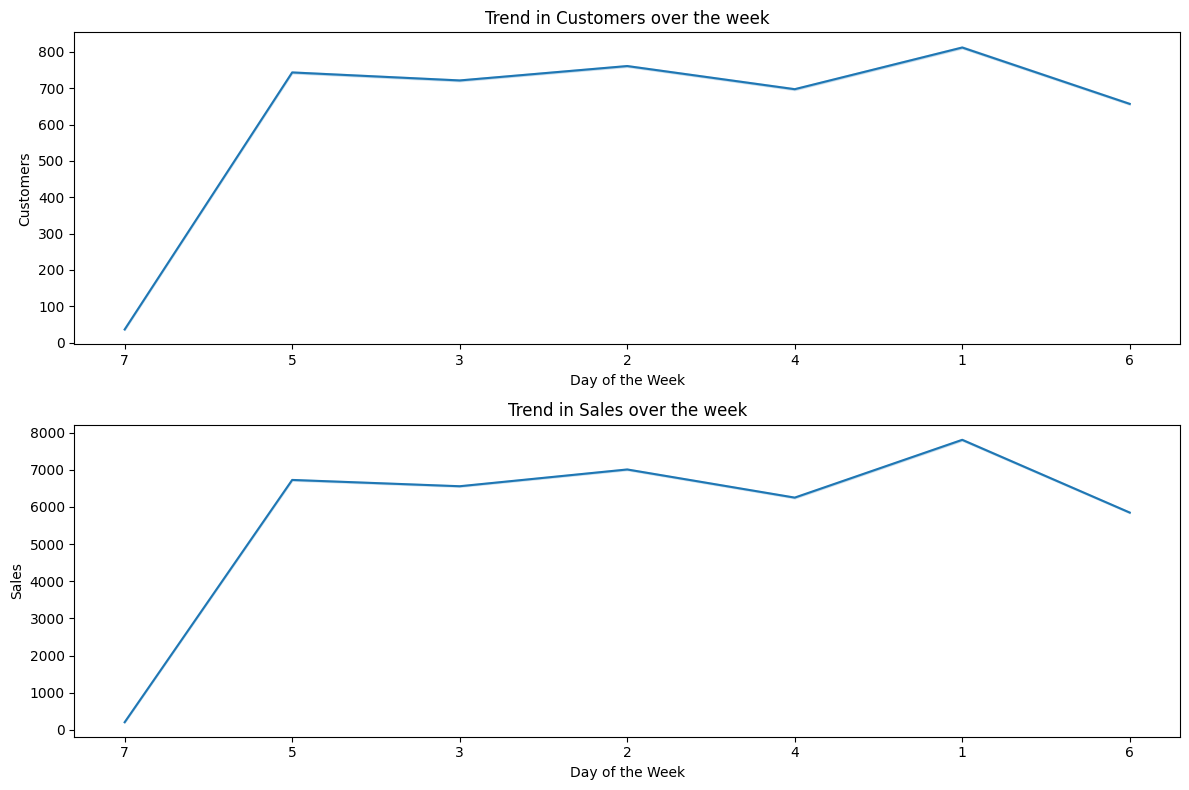


Insights for sales forecasting:
- Stores tend to have more customers when they are open compared to when they are closed.
- Stores tend to have higher sales when they are open compared to when they are closed.
- Customers and sales exhibit distinct trends over the course of the week, which could be useful for sales forecasting.


In [9]:
analyze_store_hours(train_df)

## Identifying the stores that are open on all weekdays and analyze the impact on their weekend sales.

Stores open on all weekdays: []
Average weekend sales for stores open on all weekdays: nan
Average weekend sales for other stores: nan


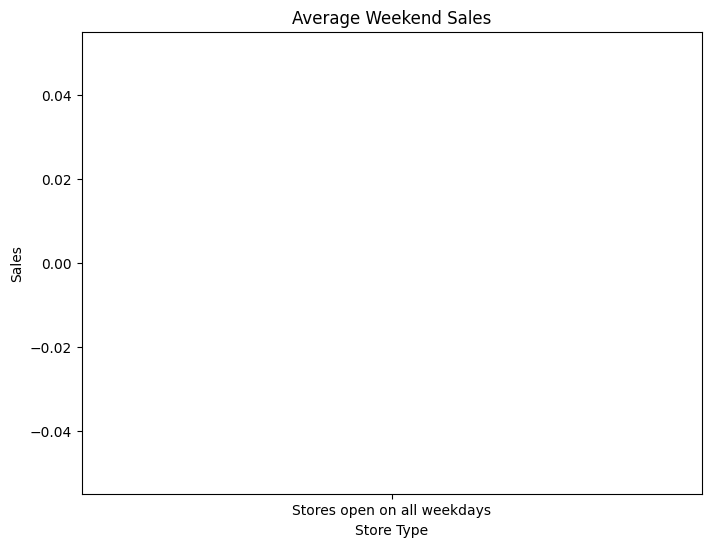

In [10]:
analyze_weekday_openings(train_df)

## Analyze the relationship between assortment type and sales

Summary statistics of sales by assortment type:
                   mean  median          std  min    max
Assortment                                              
0           5482.422961  5463.0  3685.674884    0  38484
1           8537.546709  8014.5  3866.050416    0  22137
2           6060.401872  6040.0  3992.458702    0  38037

ANOVA test results:
F-statistic: 4012.70
p-value: 0.0000

Tukey's HSD post-hoc test results:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     0      1  3055.1237   0.0   2943.676  3166.5715   True
     0      2   577.9789   0.0   557.9405   598.0173   True
     1      2 -2477.1448   0.0 -2588.7129 -2365.5768   True
-----------------------------------------------------------


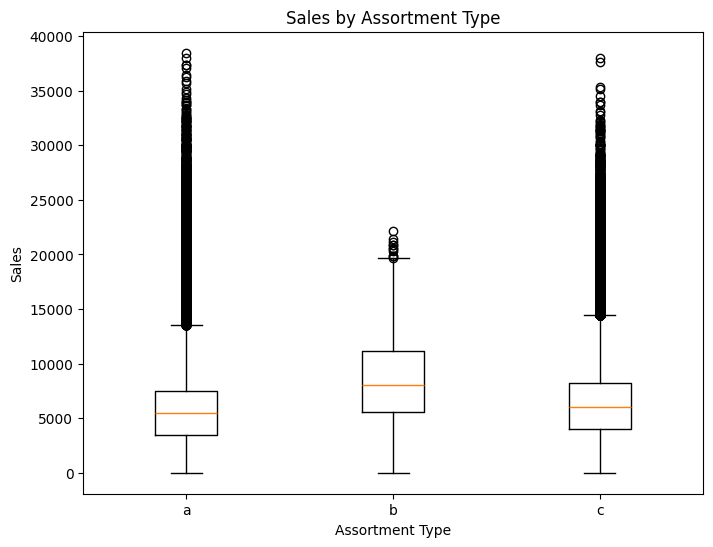

In [3]:
analyze_assortment_sales(train_df)

##  Analyze the relationship between competition distance and sales

In [7]:
analyze_competition_distance_and_sales(train_df)

NameError: name 'analyze_competition_distance_and_sales' is not defined

##  Analyze the impact of new competitors on store sales.

In [3]:
analyze_competition_impact(train_df)